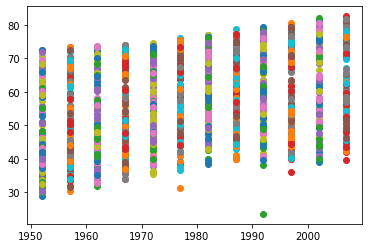

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')
data.head()

# Exercise 1

for i,row in data.iterrows():
  plt.scatter(row['year'],row['lifeExp'])
 
plt.ylabel = "Life Expectancy"
plt.xlabel = "Year"
plt.title = "Life Expectancy vs Time"
plt.show()

# Question 1: Yes there seems to be a general trend that life expectancy is
# increasing over time. The trend could be interpreted as slightly linear,
# generally speaking. 

# Question 2: The distribution of life expectancy across countries for
# individual years are positively skewed towards countires having lower life 
# expectancy from 1952 to about 1982 when it switches to being negatively swewed 
# towards having a longer life expectancy. 

# Question 3: If you were to fit a linear regression model of life expectancy vs
# year (treating it as a continuous variable), and test for a relationship 
# between year and life expectancy, I would REJECT the null hypothesis of 
# no relationship because I believe that life expectancy will increase over the
# years as technology and medicine improve.

# Question 4: A violion plot of residuals from the linear model of Question 3
# would have a larger range of positive residuals straying from the mean until 
# we reach about halfway into the violin plot where there transitions into a 
# larger range of negative residuals straying away from the mean.





# Question 5: The violin plot SHOULD look more like bricks or rectangles under
# the assumption of the linear regression model in order to maintain a linear
# relationship.    

In [ ]:
# Exercise 2
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = np.array(data['year']).reshape((-1,1))
y = np.array(data['lifeExp'])
mod = reg.fit(x,y)
intercept = mod.intercept_
slope = mod.coef_
cod = mod.score(x,y)

print('coefficient of determination ',cod)
print('intercept ', intercept)
print('slope', slope)
# Question 6: On  average, life expectancy increases every year by about .325
# years.

regr = ols(formula = 'lifeExp ~ year', data=data).fit()
regr.f_pvalue
# Question 7: We will reject the null hypothesis because the p-value is smaller
# than .05 because we do have sufficient evidence that there is a relationship 
# between life expectancy and year.

coefficient of determination  0.18975713852188814
intercept  -585.6521874415448
slope [0.32590383]


7.546794625598736e-80

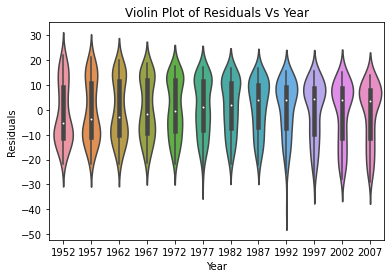

In [ ]:
# Exercise 3
import seaborn as sns
data['residuals'] = data['lifeExp'] - (mod.intercept_ + mod.coef_*data['year'])
sns.violinplot(x="year", y ="residuals",data=data).set(title = 'Violin Plot of Residuals Vs Year', xlabel = 'Year', ylabel = 'Residuals')
plt.show()

# Question 8
# Based on the way I interpreted Question 4, I was correct in the sense that the
# tadpole shape (long tail, fat head) would flip from tail on the top to tail on
# the bottom after about halfway.





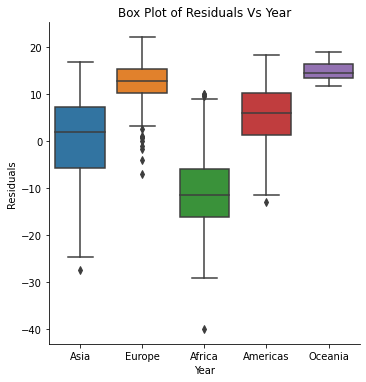

In [ ]:
# Exercise 4
sns.catplot(x="continent", y = "residuals",kind="box",data=data).set(title = 'Box Plot of Residuals Vs Year', xlabel = 'Year', ylabel = 'Residuals')
plt.show()
# Question 9
# There seems to be a dependence between model residual and continent. Because 
# of this, when we perform a regression analysis of life expectancy across time
# we must separate the data by continent. Some countries have higher standards 
# of living and better economies that will allow them to live healthier and 
# longer lives.

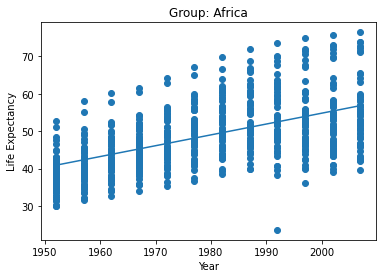

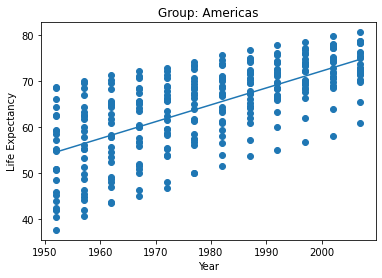

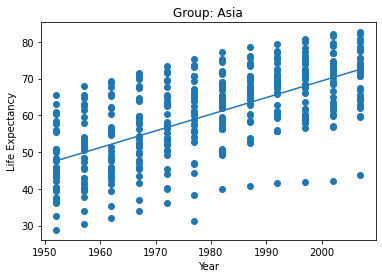

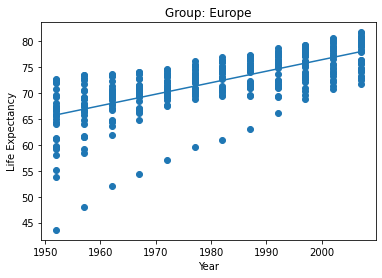

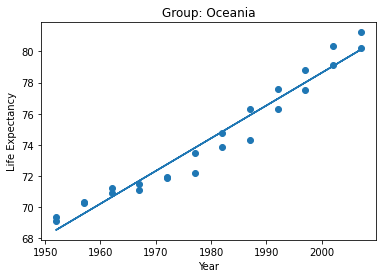

In [ ]:
# Exercise 5
#info = data.melt(ids_vars=['year','lifeExp'])
for idx, gp in data.groupby('continent'):
  fig,ax = plt.subplots()
  ax.scatter(x=gp['year'],y=gp['lifeExp'])
  ax.set_ylabel('Life Expectancy')
  ax.set_xlabel('Year')
  ax.set_title(f'Group: {idx}')
  m,b = np.polyfit(gp['year'],gp['lifeExp'],1)
  plt.plot(gp['year'],m*gp['year']+b)
  plt.show()

# Question 10:
# Based on my plots, my regression model should include an interaction term for 
# continent and year because all five countries life expectancy slope over the 
# years are different from eachother.


In [ ]:
# Exercise 6


fit = ols('lifeExp ~ C(continent)*year',data=data).fit()
print(fit.summary())

# Question 11
# All of the parameters in the model are not significantly different from zero 
# because they all fit the model well.

# Question 12
add = 0.289529
america = .078122+add
asia = .163593 + add
europe = -.067597+add
oceania = -.079257+add
africa = add
print('On average the life expectancy in America increases by ' + str(america) + ' years every year')
print('On average the life expectancy in Asia increases by ' + str(asia) + ' years every year')
print('On average the life expectancy in Europe increases by ' + str(europe) + ' years every year')
print('On average the life expectancy in Oceania increases by ' + str(oceania) + ' years every year')
print('On average the life expectancy in Africa increases by ' + str(africa) + ' years every year')

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:56:32   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

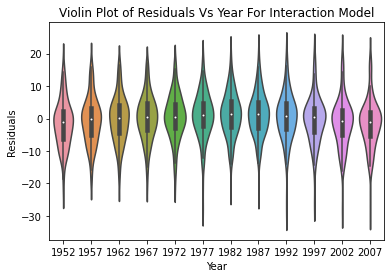

In [ ]:
# Exercise 8
newprediction = fit.predict()
newresiduals = np.subtract(data['lifeExp'],newprediction)
sns.violinplot(y=newresiduals,x=data['year'],data=data).set(title = 'Violin Plot of Residuals Vs Year For Interaction Model', xlabel = 'Year', ylabel = 'Residuals')
plt.show()

In [ ]:
# Part 2
# Problem 1
# Stochastic
# data(X,y), T time steps, alpha step
def grad_descent_lin(X, y, T, alpha):
  m,n = X.shape
  # m = # examples, n = # features
  # initializing parameters
  theta = np.zeros(n)
  # track loss over time
  f = np.zeros(T)
  for i in range(T):
    # loss for current parameter vector theta
    f[i] = 0.5*np.linalg.norm(X.dot(theta)-y)**2
    # compute steepest ascent at f(theta)
    g = X.T.dot(X.dot(theta)-y)
    # step down the gradient
    theta = theta-alpha*g
  return theta,f

# Problem 3

#Stochastic
def grad_descent_log(X, y, T, alpha):
  #initialize weights, loss, and the gradient
  m,n = X.shape
  theta = np.zeros(n)
  f = np.zeros(m)
  g = 0
  for t in range(T):
    # find loss and gradient by finding partial derivative of our loss function
    # wrt our weights theta
    for i in range(m):
      f[i] = compute_loss(X[i],y[i],theta)
      g = f[i] * X[i]
      # update theta by stepping in direction of gradient
      theta = theta + alpha * g
      theta = theta/np.linalg.norm(theta)
  return theta,f

def compute_loss(x,y,theta):
  return y - (np.exp(np.dot(theta,x)))/(1+np.exp(np.dot(theta,x)))

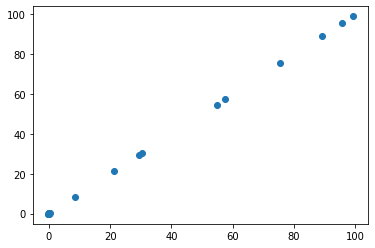

In [ ]:
# Problem 4
# Generate data for linear regression:
from sklearn.datasets import make_regression
gen_data_x, gen_data_y = make_regression(n_samples=100, n_features=20, noise = 1.5)

# Generate data for logistic regression. This is similar to linear, 
# only now values are either 0 or 1.  
log_gen_data_x, dump_y = make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]


theta1,f1 = grad_descent_lin(gen_data_x,gen_data_y,15000,.0001)
theta2,f2 = grad_descent_log(log_gen_data_x,log_gen_data_y,15000,.0001)

reg = linear_model.LinearRegression()
reg.fit(gen_data_x,gen_data_y)
plt.plot(reg.coef_,theta1,'o')


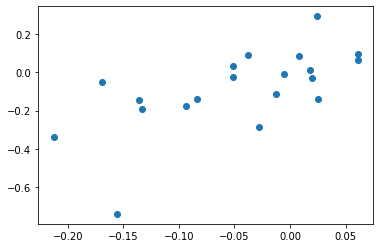

In [ ]:

reg2 = linear_model.LinearRegression()
reg2.fit(log_gen_data_x,log_gen_data_y)
plt.plot(reg2.coef_,theta2,'o')

# My Linear gradient descent algorithm fits the data well. The logistic gradient
# decent algorithm fits the data but not as well as the linear. They both appear
# linear though.

In [ ]:
# Try it out!

# The dataset that I am using is the sklearn dataset for wine. The
# outcome that I am predicting is wine quality between 0 and 10 based on 
# 11 input variables, (fixed acidity, volatile acidity, citric acid, residual
# sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, 
# sulphates, alcohol)

# LINEAR DISCRIMINANT ANALYSIS
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
wi = load_wine()
data = pd.DataFrame(data=np.c_[wi['data'],wi['target']],
                    columns=wi['feature_names']+['target'])
print(data.describe())
# define dataset
X,y = load_wine(return_X_y=True)
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))



# LINEAR SVM
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X,y)
y_pred = svclassifier.predict(X)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))


          alcohol  malic_acid  ...      proline      target
count  178.000000  178.000000  ...   178.000000  178.000000
mean    13.000618    2.336348  ...   746.893258    0.938202
std      0.811827    1.117146  ...   314.907474    0.775035
min     11.030000    0.740000  ...   278.000000    0.000000
25%     12.362500    1.602500  ...   500.500000    0.000000
50%     13.050000    1.865000  ...   673.500000    1.000000
75%     13.677500    3.082500  ...   985.000000    2.000000
max     14.830000    5.800000  ...  1680.000000    2.000000

[8 rows x 14 columns]
Mean Accuracy: 0.987 (0.024)
[[59  0  0]
 [ 0 70  1]
 [ 0  0 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      0.99      0.99        71
           2       0.98      1.00      0.99        48

    accuracy                           0.99       178
   macro avg       0.99      1.00      0.99       178
weighted avg       0.99      0.99      0.99  